# **Comprehensive Inference: Beijing**

<p align="center">
    <img src="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/blob/main/assets/image.png" height=450 width=1280 alt=""/>
</p>

<small>Picture Source: <a href="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/">RSandAI, Comprehensive YOLO Airplane Detection</a></small>

<br>

## **Context**

Comprehensive inference in deep learning involves techniques to make predictions on large inputs by efficiently handling high-dimensional data. This can include methods like attention mechanisms, hierarchical models, or data augmentation strategies to ensure robust performance across diverse datasets.

<br>

**Top 6 Models:**

| Rank | Experiment ID | Model | Network size | Optimizer | Augmentation | F1 Score | Precision | Recall | mAP50 | mAP75 | mAP50-95 |
|--|--|--|--|--|--|--|--|--|--|--|--|
| 1 | 12 | YOLOv8x | 960x960 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9932 | 0.9915 | 0.9950 | 0.9939 | 0.9925 | 0.8990 |

<br>

Make sure your runtime is **GPU** (_not_ CPU or TPU). And if it is an option, make sure you are using _Python 3_. You can select these settings by going to `Runtime -> Change runtime type -> Select the above mentioned settings and then press SAVE`.

## **0. Initial Steps**

### **0.1 Download Library**

In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 12.8 MB/s eta 0:00:00


### **0.2. Import Libraries and Connect Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import seaborn as sns
import os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### **0.3. Define Paths of Model Weights**

In [ ]:
# @markdown ---

MODEL_1_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8x/Experiment_No_12/detect/train/weights/best.pt' # @param {type:"string"}

## **1. Validate Models**

The A100 GPU is a powerful graphics processing unit (GPU) developed by NVIDIA. It is part of the NVIDIA Ampere architecture and is designed for high-performance computing tasks, including deep learning, data analytics, and scientific computing. The A100 GPU offers significant improvements in performance and efficiency compared to previous GPU models, making it ideal for demanding AI and machine learning applications.

In [ ]:
!nvidia-smi

Mon Oct 14 14:13:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
def calculate_accuracy(TP, FN, FP):

    accuracy = (TP) / (TP + FN + FP)

    return accuracy

### **1.1. Validate Model 1 - Level 1**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_1.yaml', imgsz=640)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level1/val/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]

val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level1/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]


                   all          1         31      0.778      0.903      0.926      0.665
Speed: 0.9ms preprocess, 125.6ms inference, 0.0ms loss, 1497.2ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9255 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.7957 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.6654 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.7778 - Mean Precision of all classes.
metrics.box.mr: 0.9032 - Mean Recall of all classes.
metrics.box.p: 0.7778 - Precision for each class.
metrics.box.r: 0.9032 - Recall for each class.
metrics.box.f1: 0.8358 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.7778 - Percentage of correct positive predictions.
Recall: 0.9032 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9255 - Mean Average Precision at 50% IOU.
mAP50-95: 0.6654 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8358 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

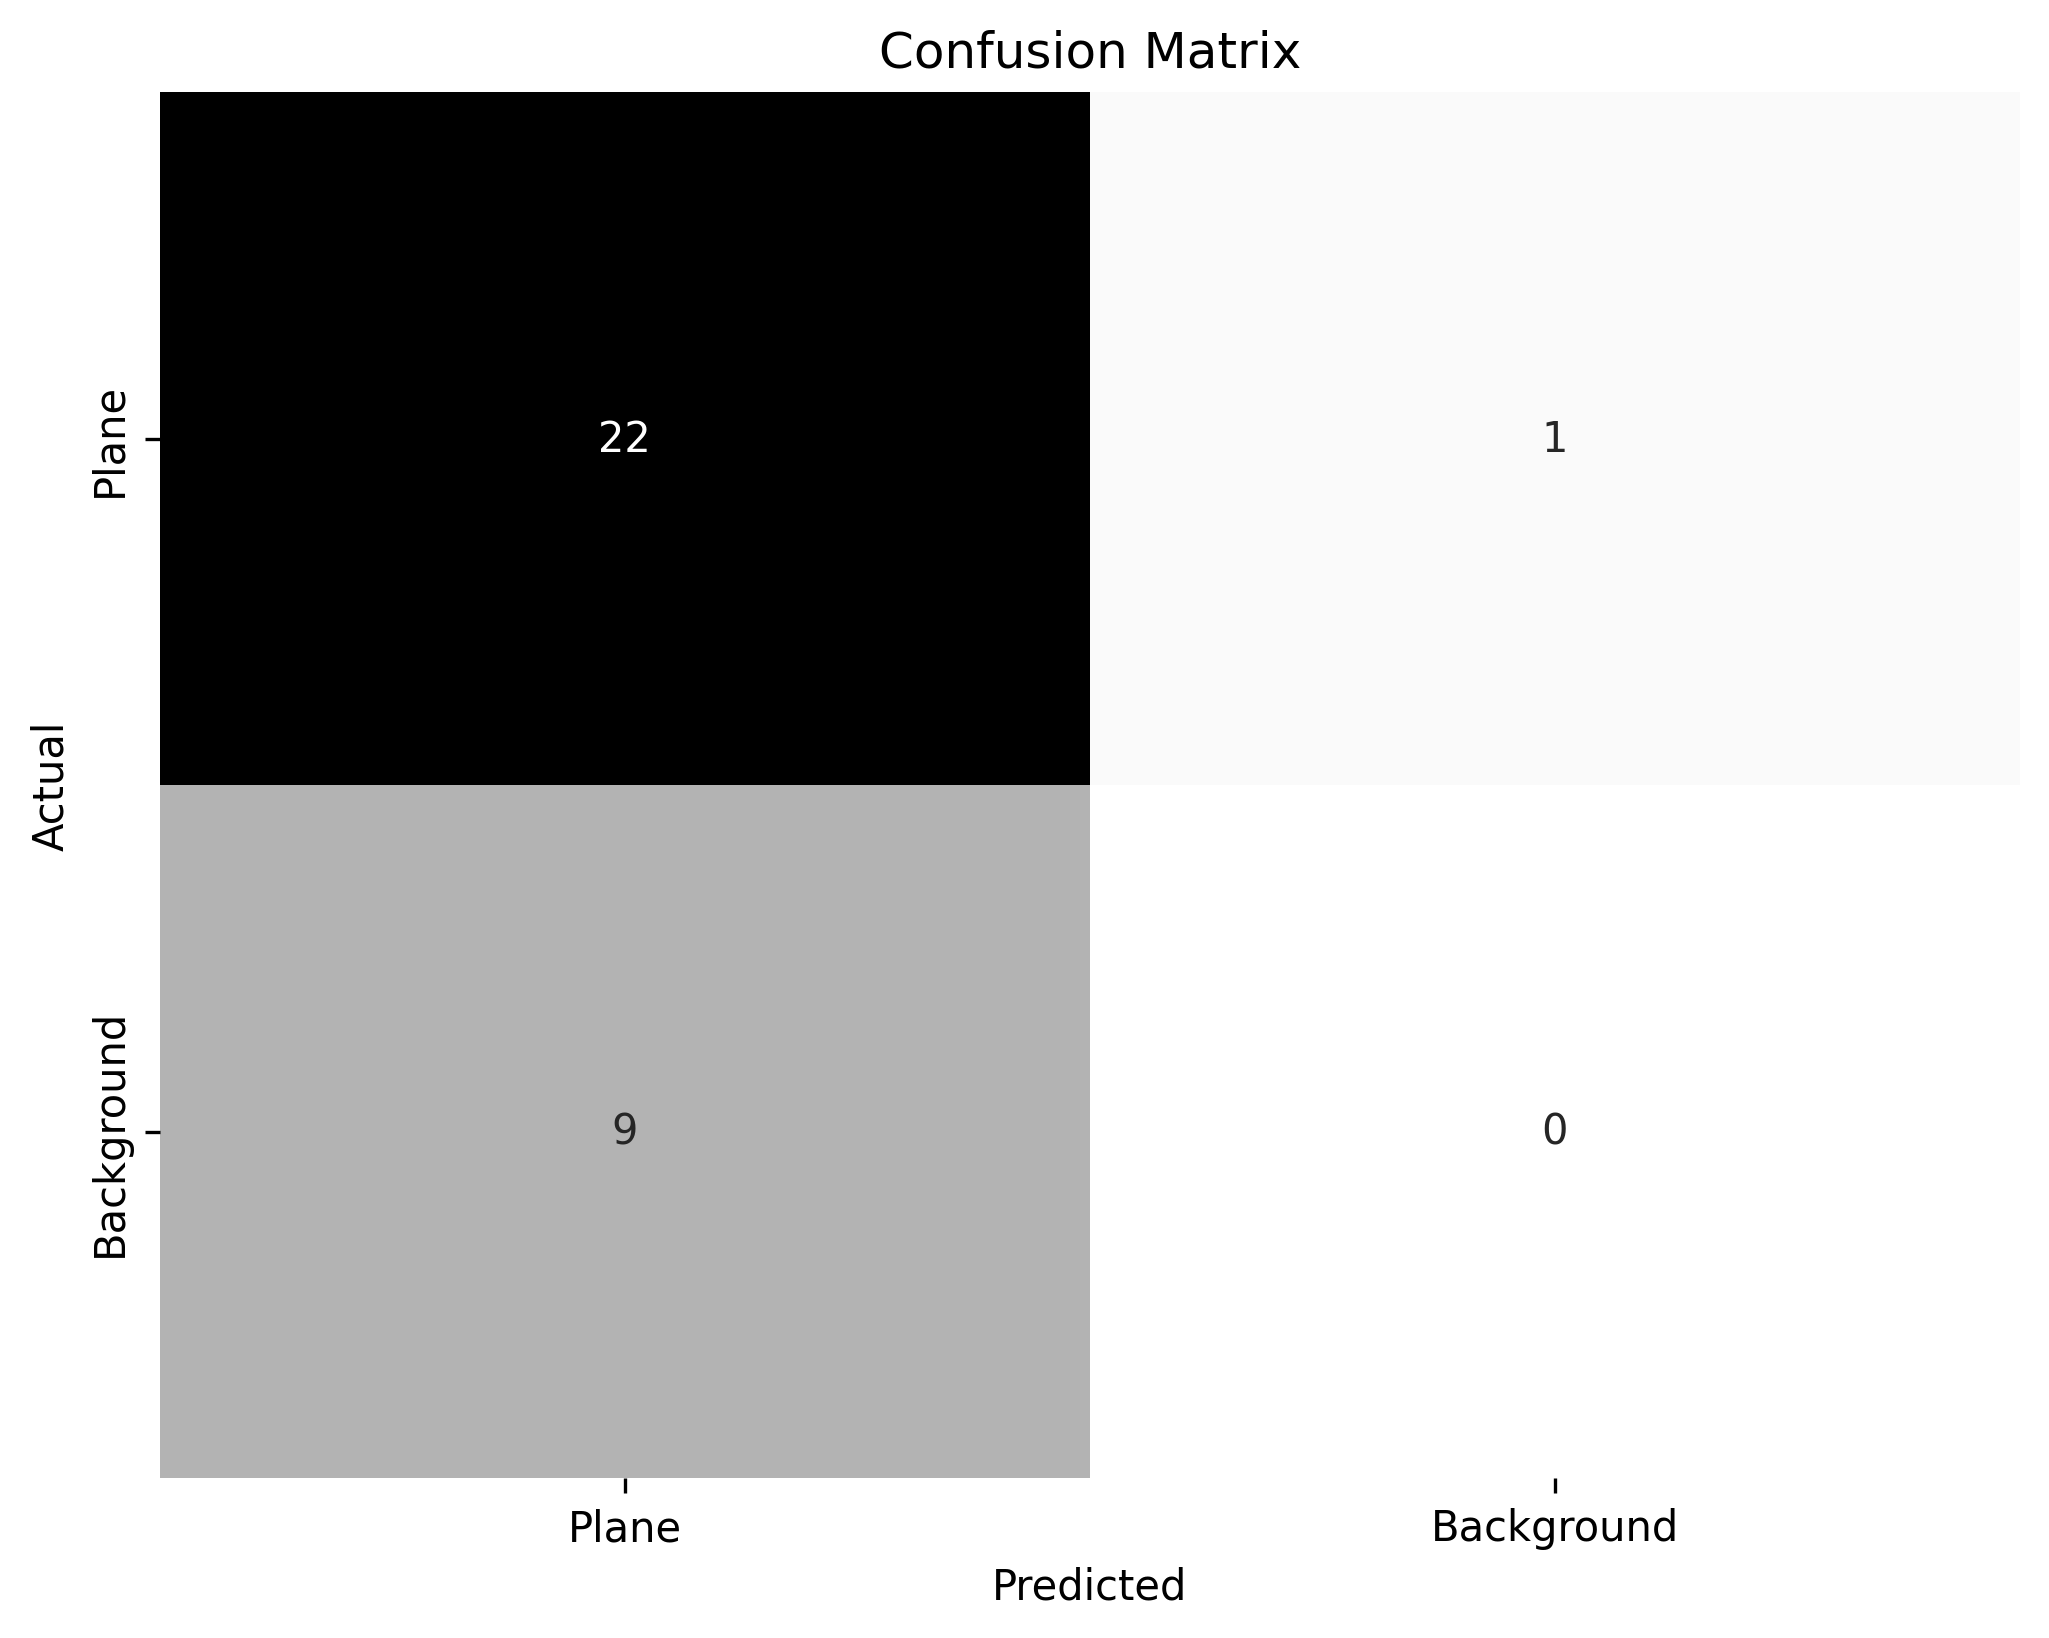

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.6875


### **1.2. Validate Model 2 - Level 1**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_1.yaml', imgsz=960)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level1/val/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]


                   all          1         31          1      0.966      0.994      0.761
Speed: 0.7ms preprocess, 222.6ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9941 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9436 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7605 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 1.0000 - Mean Precision of all classes.
metrics.box.mr: 0.9659 - Mean Recall of all classes.
metrics.box.p: 1.0000 - Precision for each class.
metrics.box.r: 0.9659 - Recall for each class.
metrics.box.f1: 0.9827 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 1.0000 - Percentage of correct positive predictions.
Recall: 0.9659 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9941 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7605 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9827 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

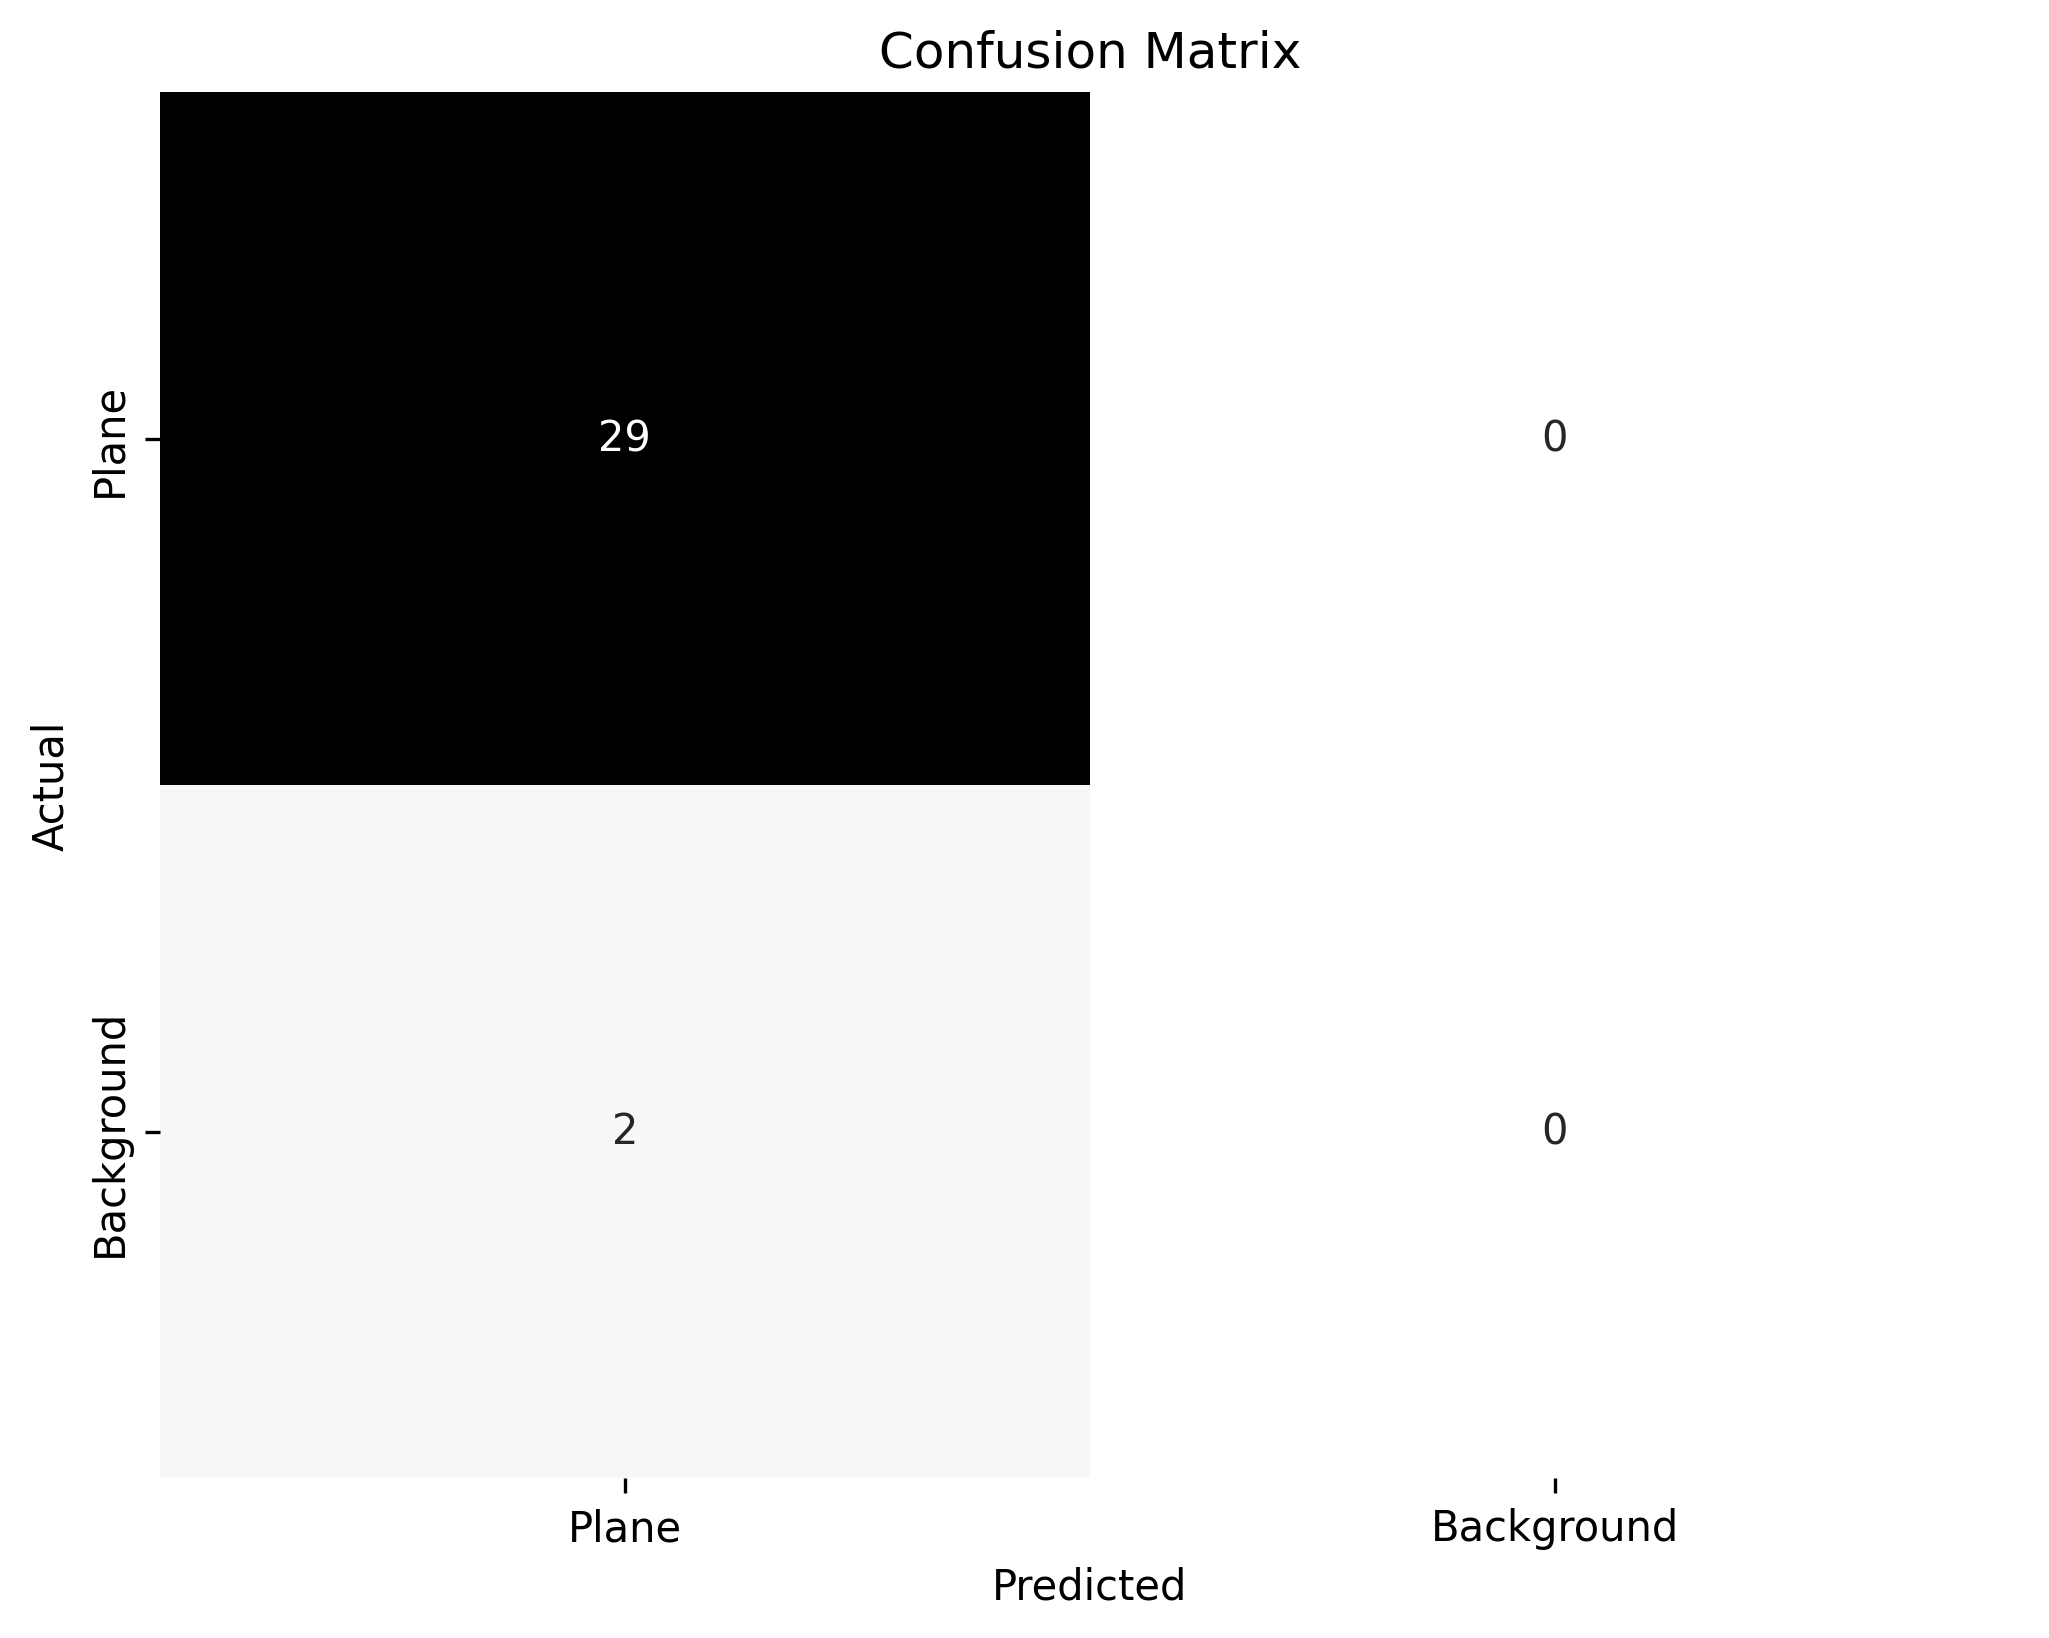

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9355


### **1.3. Validate Model 3 - Level 2**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_2.yaml', imgsz=640)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level2/val/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:08<00:00,  2.15s/it]

val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level2/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]


                   all          4         31      0.998      0.968      0.994      0.774
Speed: 0.3ms preprocess, 97.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9941 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9941 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7736 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9982 - Mean Precision of all classes.
metrics.box.mr: 0.9677 - Mean Recall of all classes.
metrics.box.p: 0.9982 - Precision for each class.
metrics.box.r: 0.9677 - Recall for each class.
metrics.box.f1: 0.9827 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9982 - Percentage of correct positive predictions.
Recall: 0.9677 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9941 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7736 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9827 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

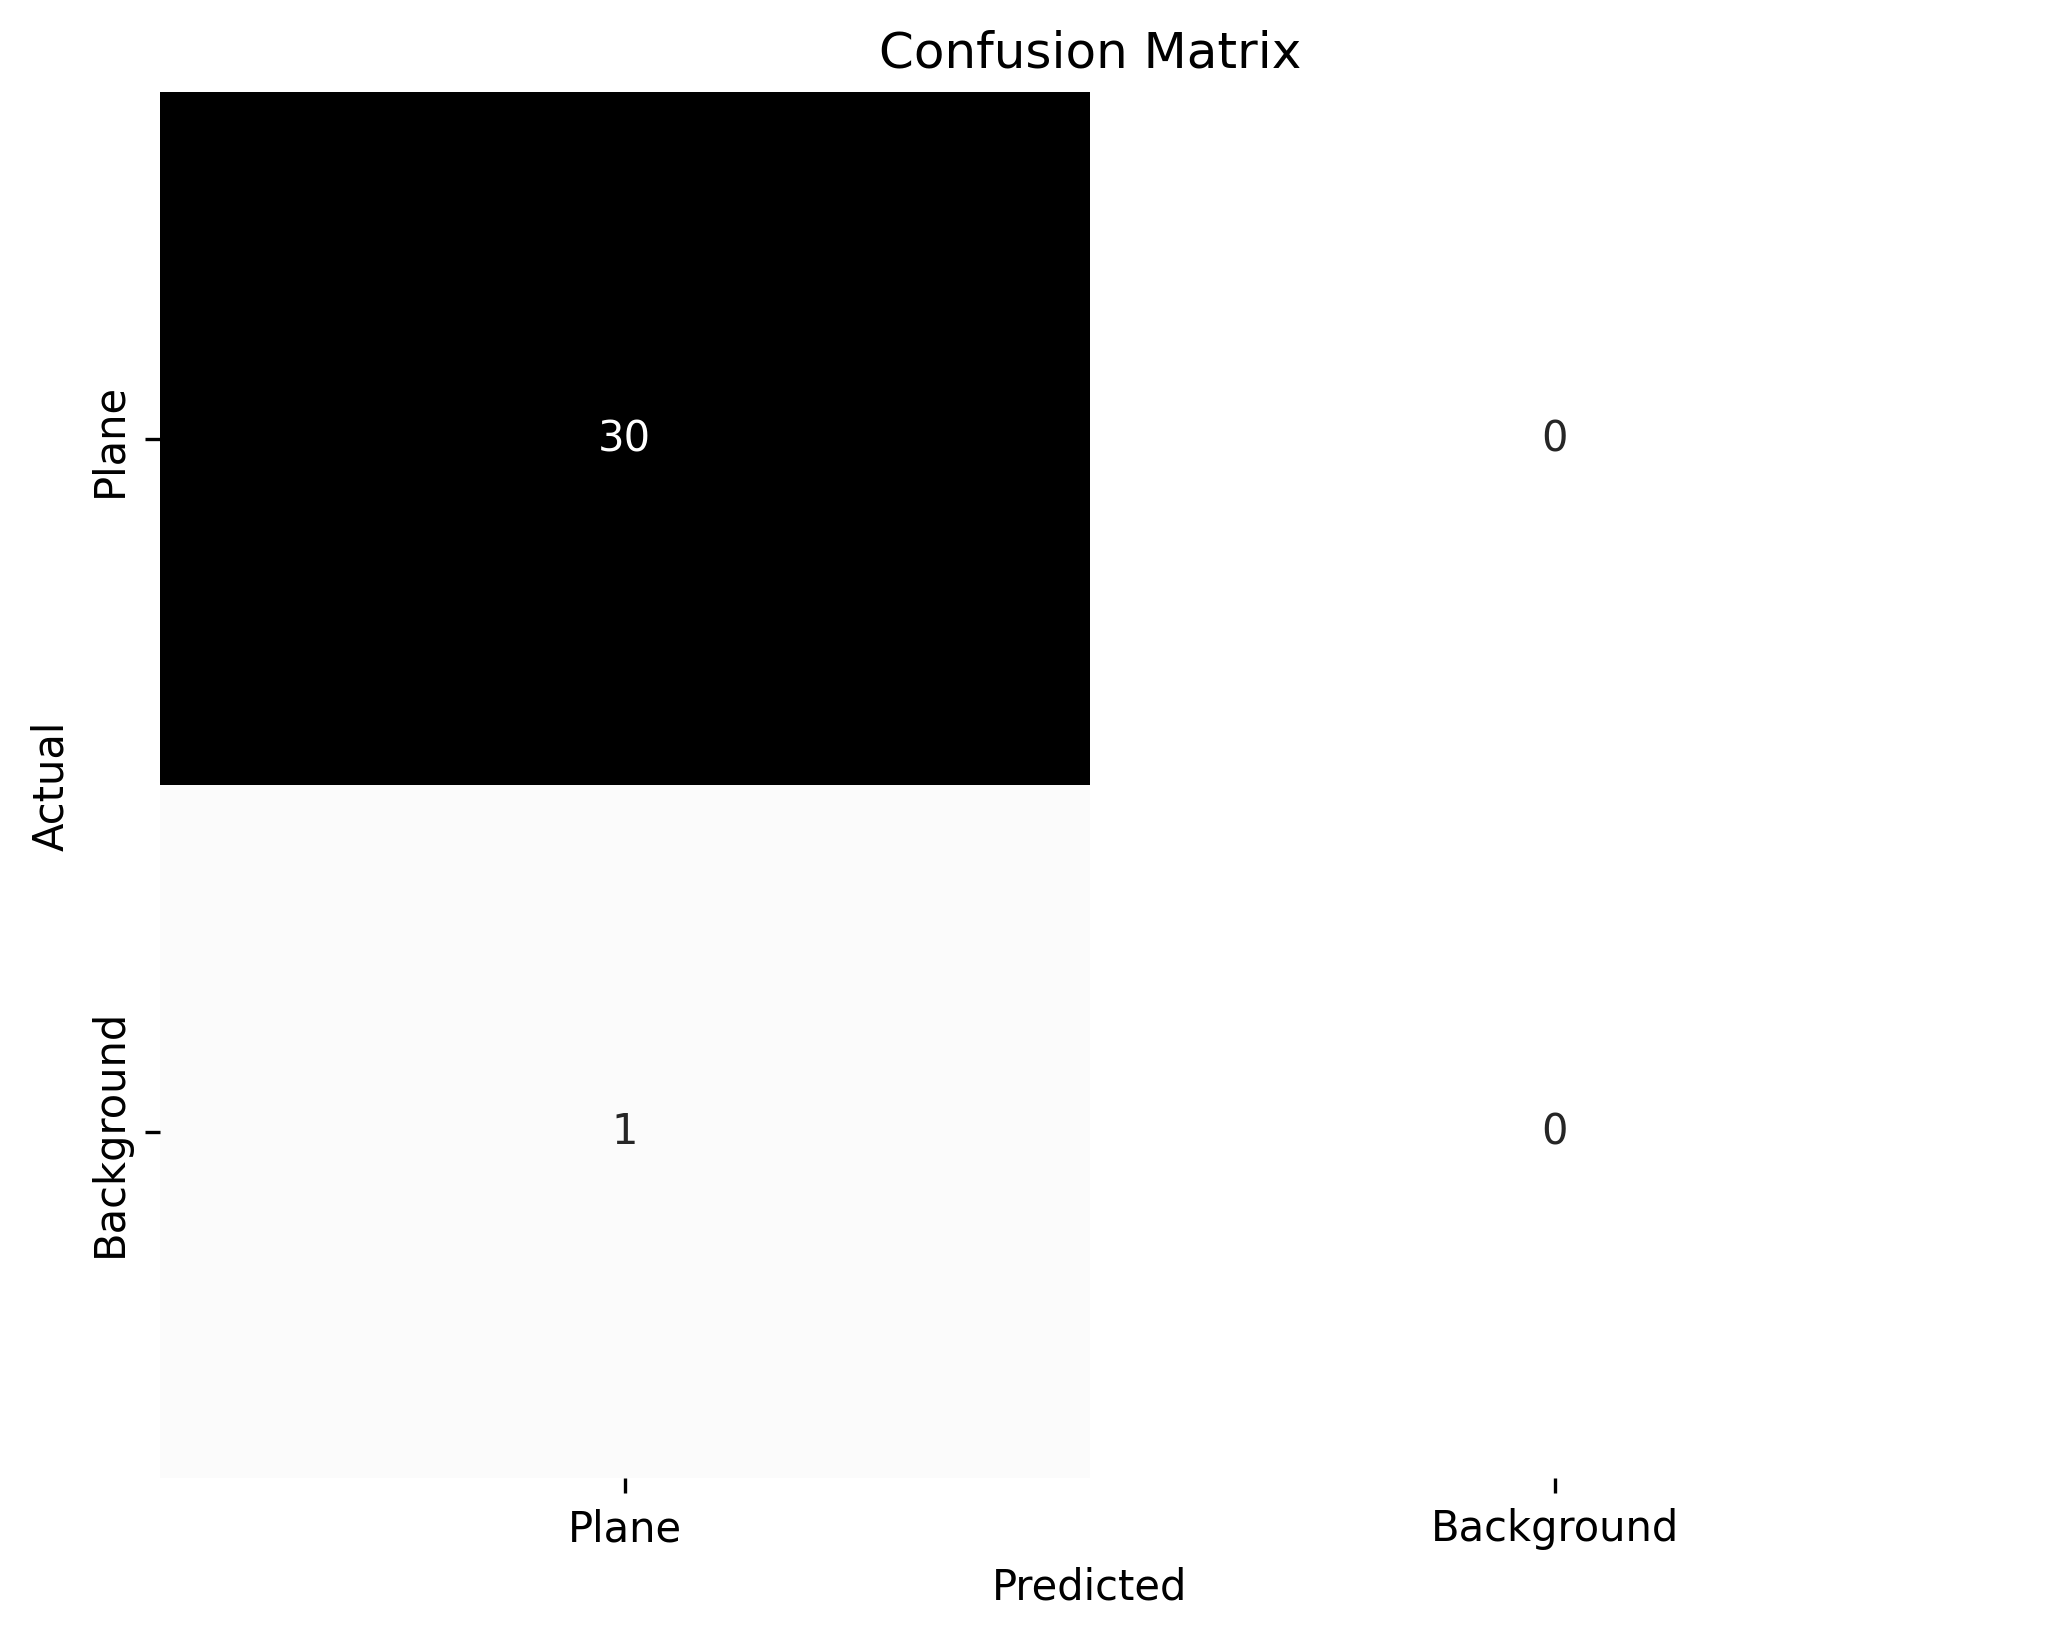

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9677


### **1.4. Validate Model 4 - Level 2**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_2.yaml', imgsz=960)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level2/val/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.14s/it]


                   all          4         31      0.998          1      0.995      0.785
Speed: 0.6ms preprocess, 151.3ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val4


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9950 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9950 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7854 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9984 - Mean Precision of all classes.
metrics.box.mr: 1.0000 - Mean Recall of all classes.
metrics.box.p: 0.9984 - Precision for each class.
metrics.box.r: 1.0000 - Recall for each class.
metrics.box.f1: 0.9992 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9984 - Percentage of correct positive predictions.
Recall: 1.0000 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9950 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7854 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9992 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

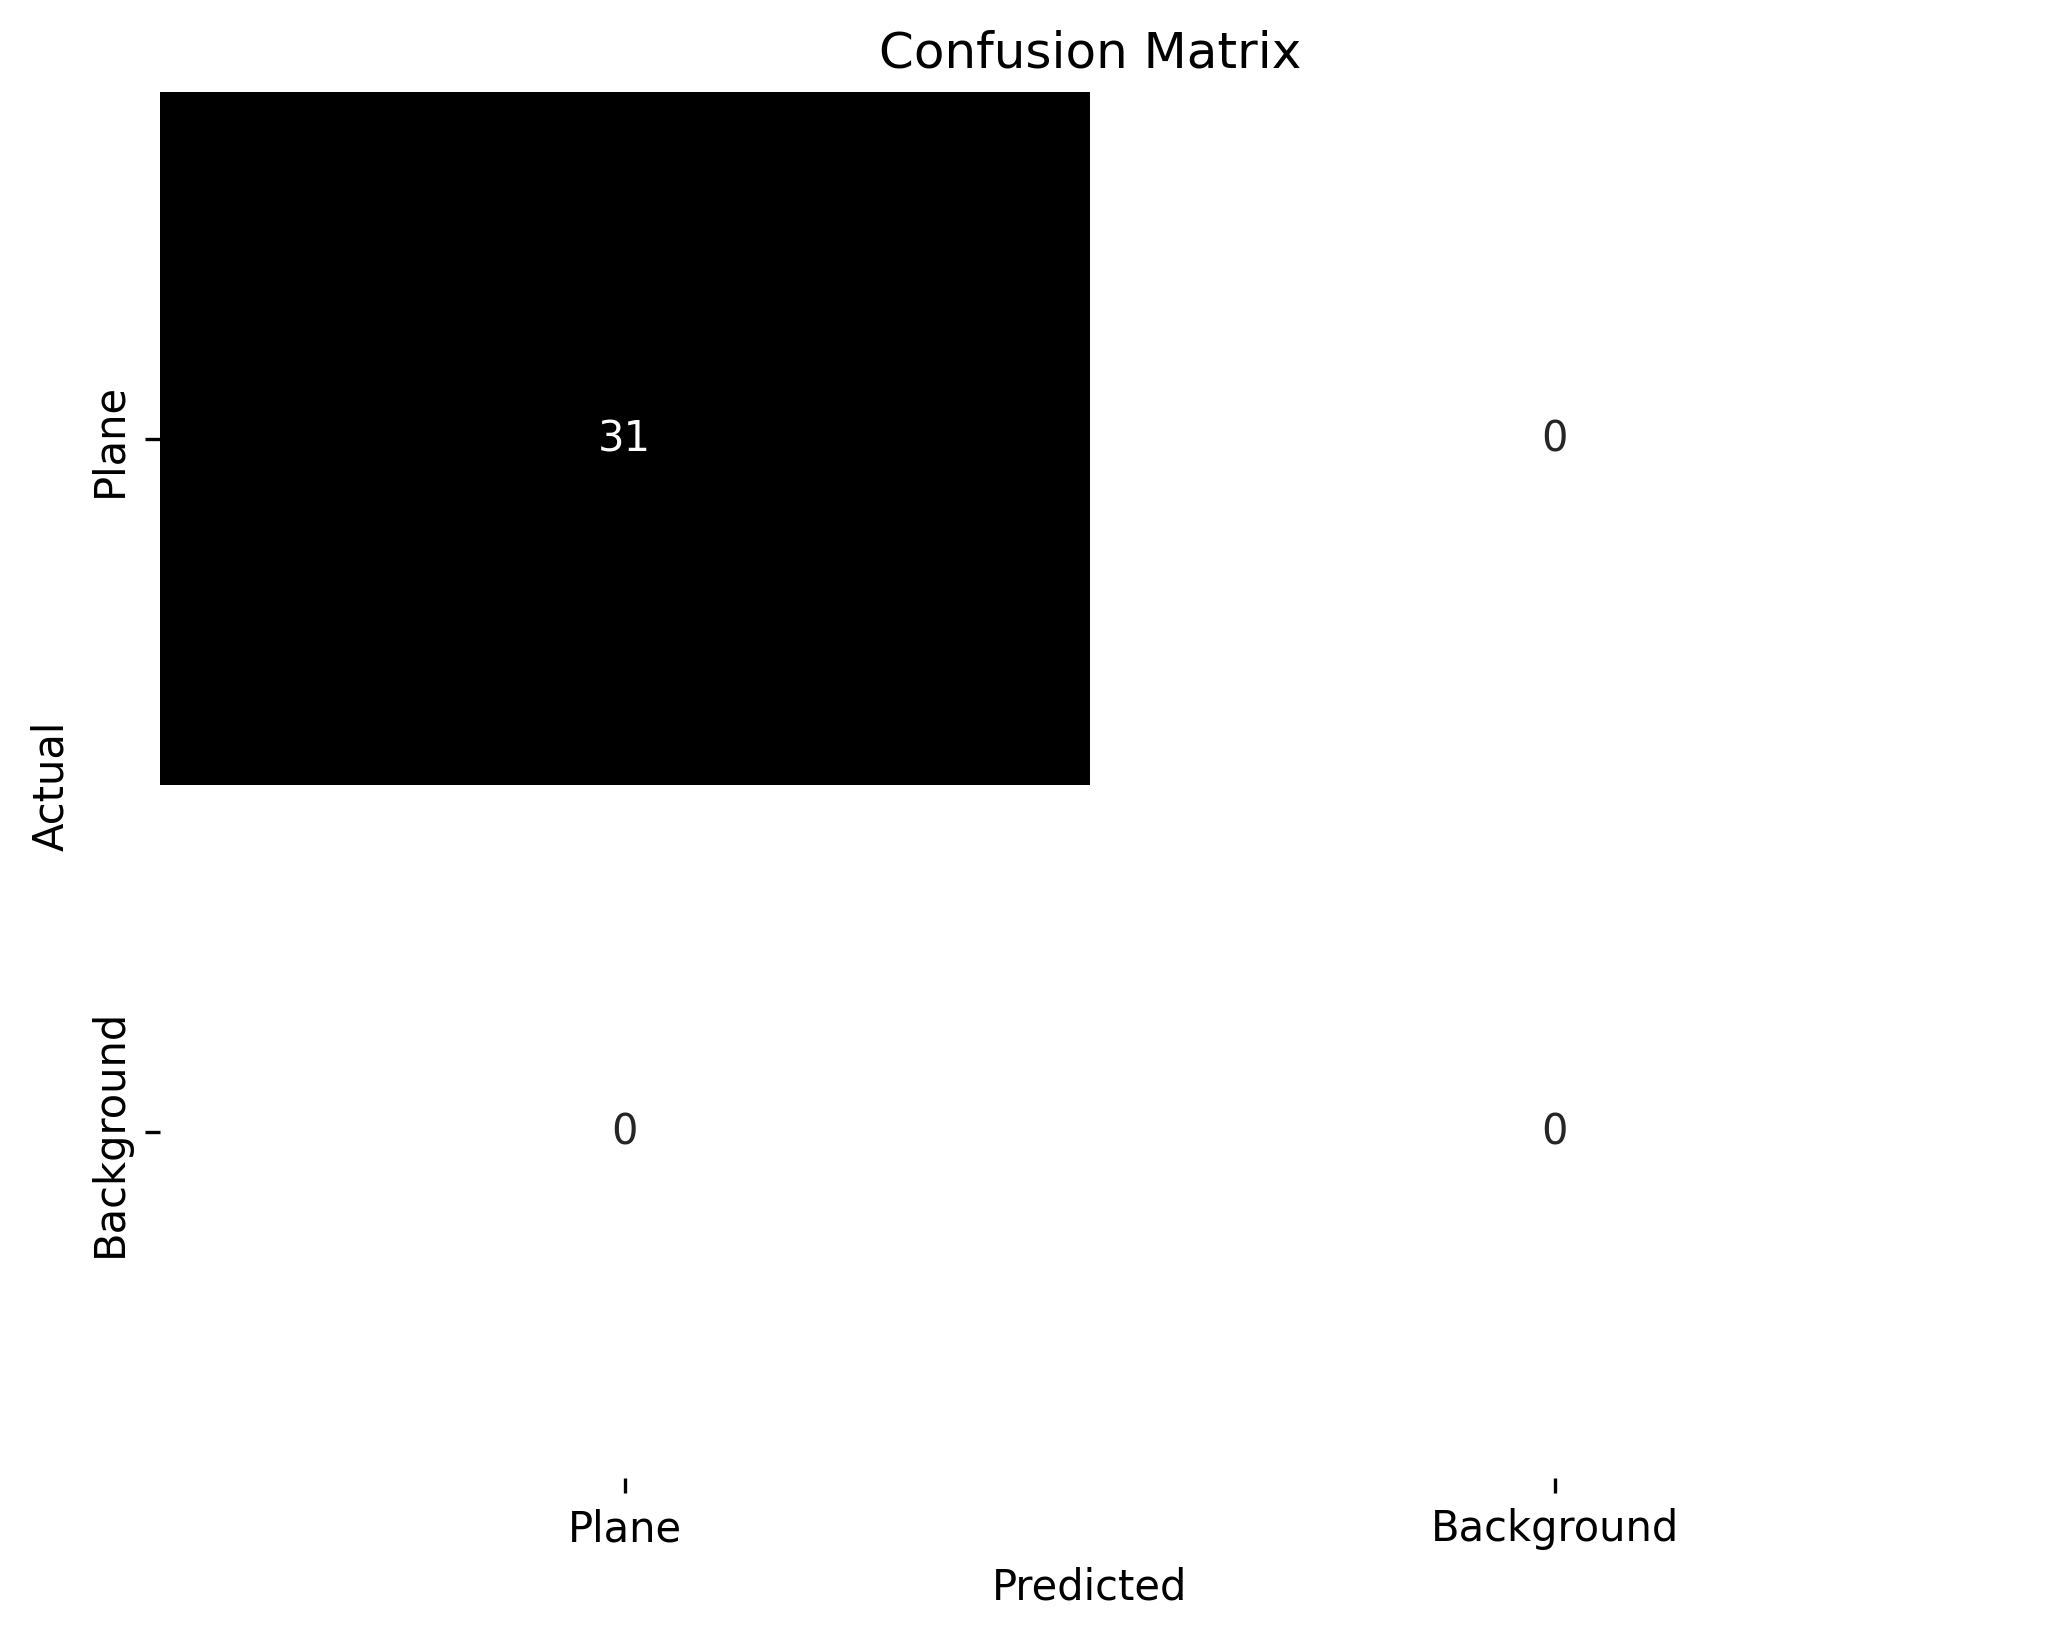

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 1.0


### **1.5. Validate Model 5 - Level 3**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_3.yaml', imgsz=640)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level3/val/labels... 12 images, 4 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:20<00:00,  1.27s/it]

val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level3/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.75s/it]


                   all         16         31      0.965      0.935      0.958      0.777
Speed: 0.2ms preprocess, 63.0ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val5


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9579 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9579 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7768 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9650 - Mean Precision of all classes.
metrics.box.mr: 0.9355 - Mean Recall of all classes.
metrics.box.p: 0.9650 - Precision for each class.
metrics.box.r: 0.9355 - Recall for each class.
metrics.box.f1: 0.9500 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9650 - Percentage of correct positive predictions.
Recall: 0.9355 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9579 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7768 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9500 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

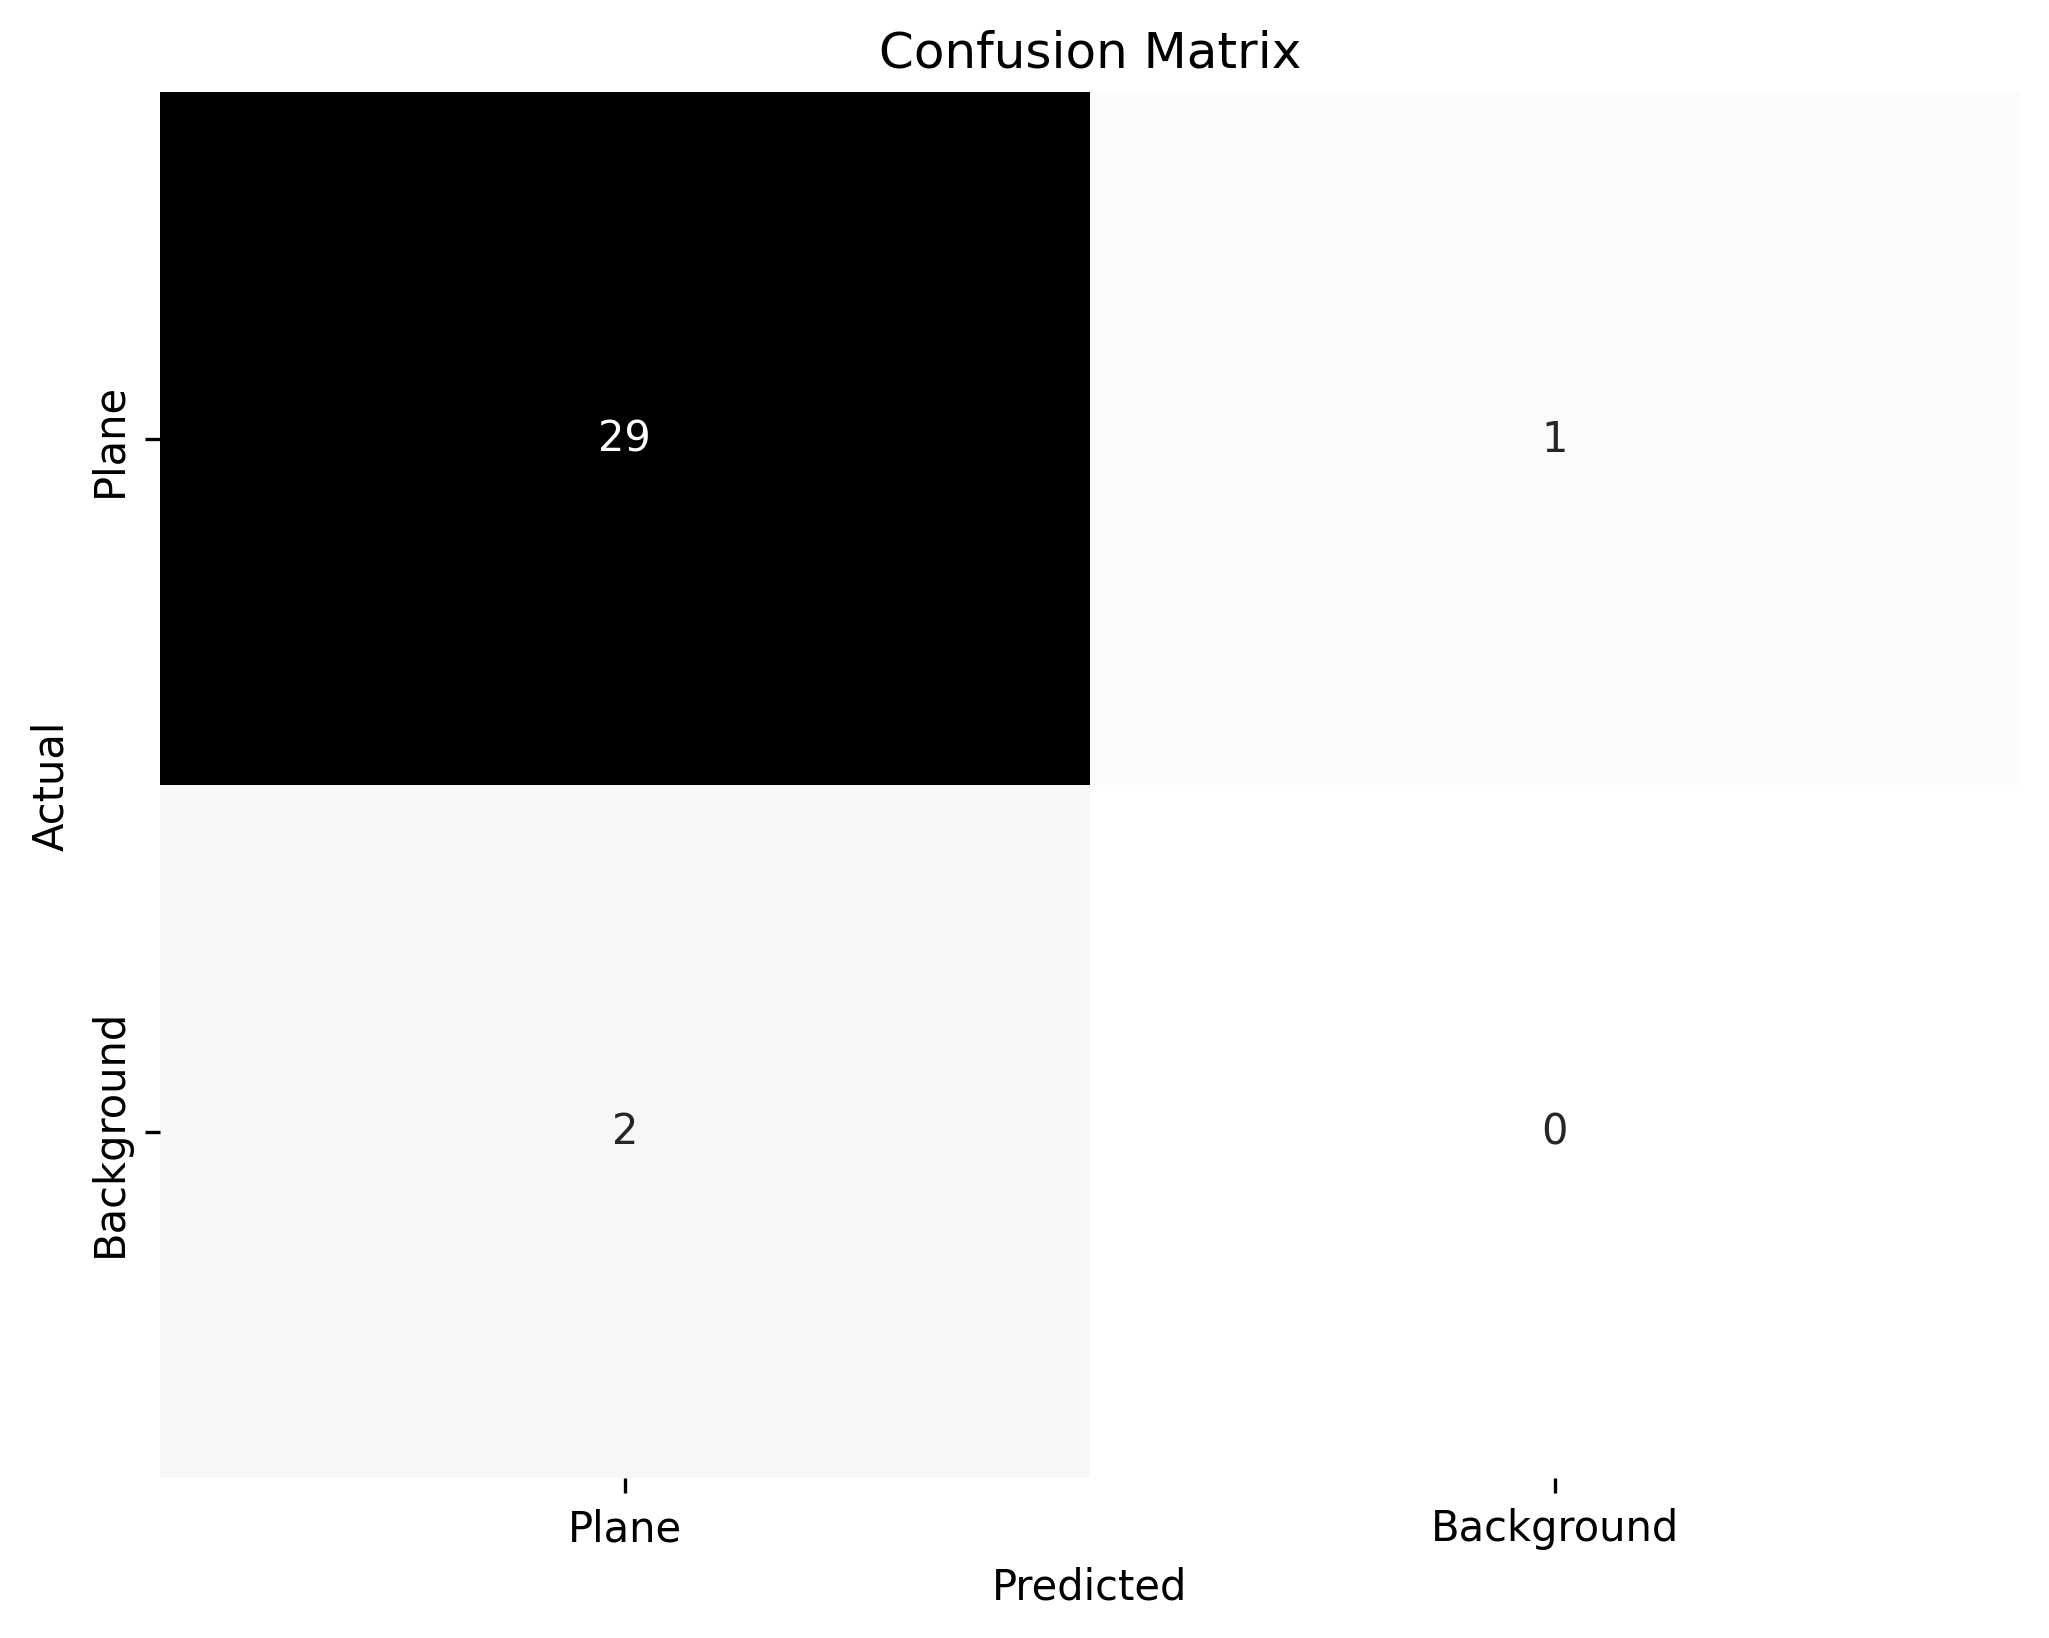

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9062


### **1.6. Validate Model 6 - Level 3**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_3.yaml', imgsz=960)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level3/val/labels.cache... 12 images, 4 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.16s/it]


                   all         16         31      0.967      0.957      0.966      0.752
Speed: 0.5ms preprocess, 129.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val6


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9660 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9660 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7518 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9674 - Mean Precision of all classes.
metrics.box.mr: 0.9570 - Mean Recall of all classes.
metrics.box.p: 0.9674 - Precision for each class.
metrics.box.r: 0.9570 - Recall for each class.
metrics.box.f1: 0.9621 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9674 - Percentage of correct positive predictions.
Recall: 0.9570 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9660 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7518 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9621 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

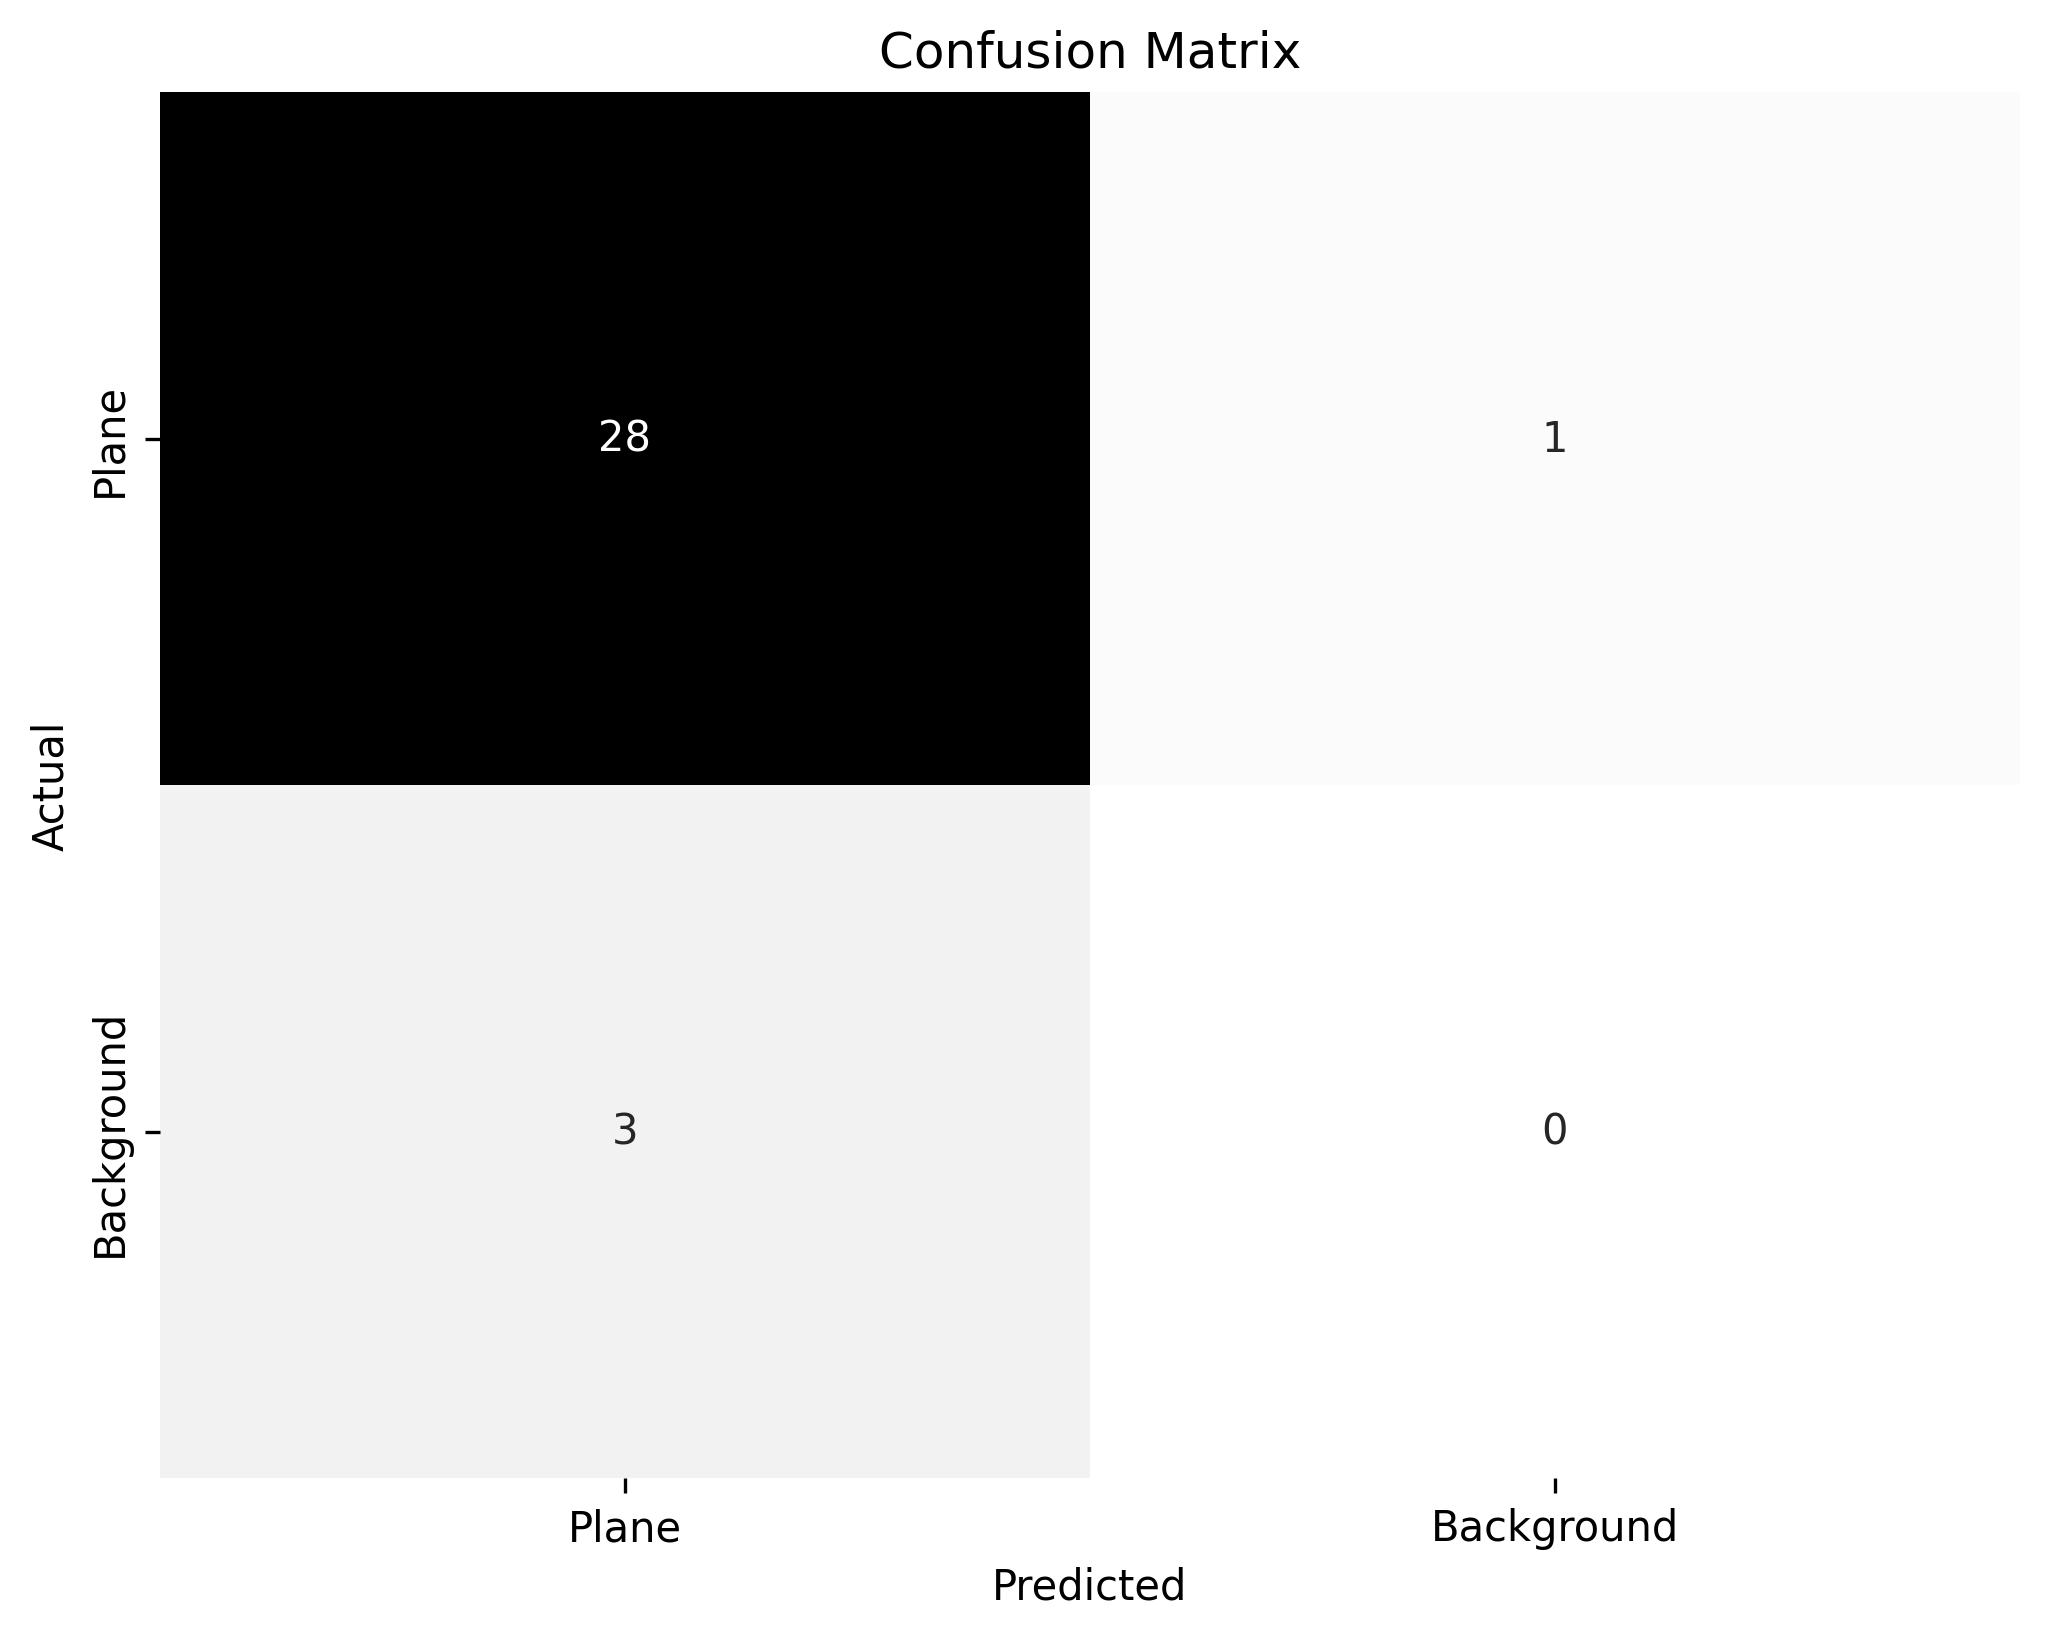

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.875


### **1280x1280 Network Size**

### **1.7. Validate Model 7 - Level 1**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_1.yaml', imgsz=1280, name="val_level_1_1280")

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level1/val/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.93s/it]


                   all          1         31          1      0.998      0.995      0.774
Speed: 1.0ms preprocess, 307.0ms inference, 0.0ms loss, 1895.8ms postprocess per image
Results saved to runs/detect/val_level_1_1280


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9950 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9736 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7741 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 1.0000 - Mean Precision of all classes.
metrics.box.mr: 0.9982 - Mean Recall of all classes.
metrics.box.p: 1.0000 - Precision for each class.
metrics.box.r: 0.9982 - Recall for each class.
metrics.box.f1: 0.9991 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 1.0000 - Percentage of correct positive predictions.
Recall: 0.9982 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9950 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7741 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9991 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

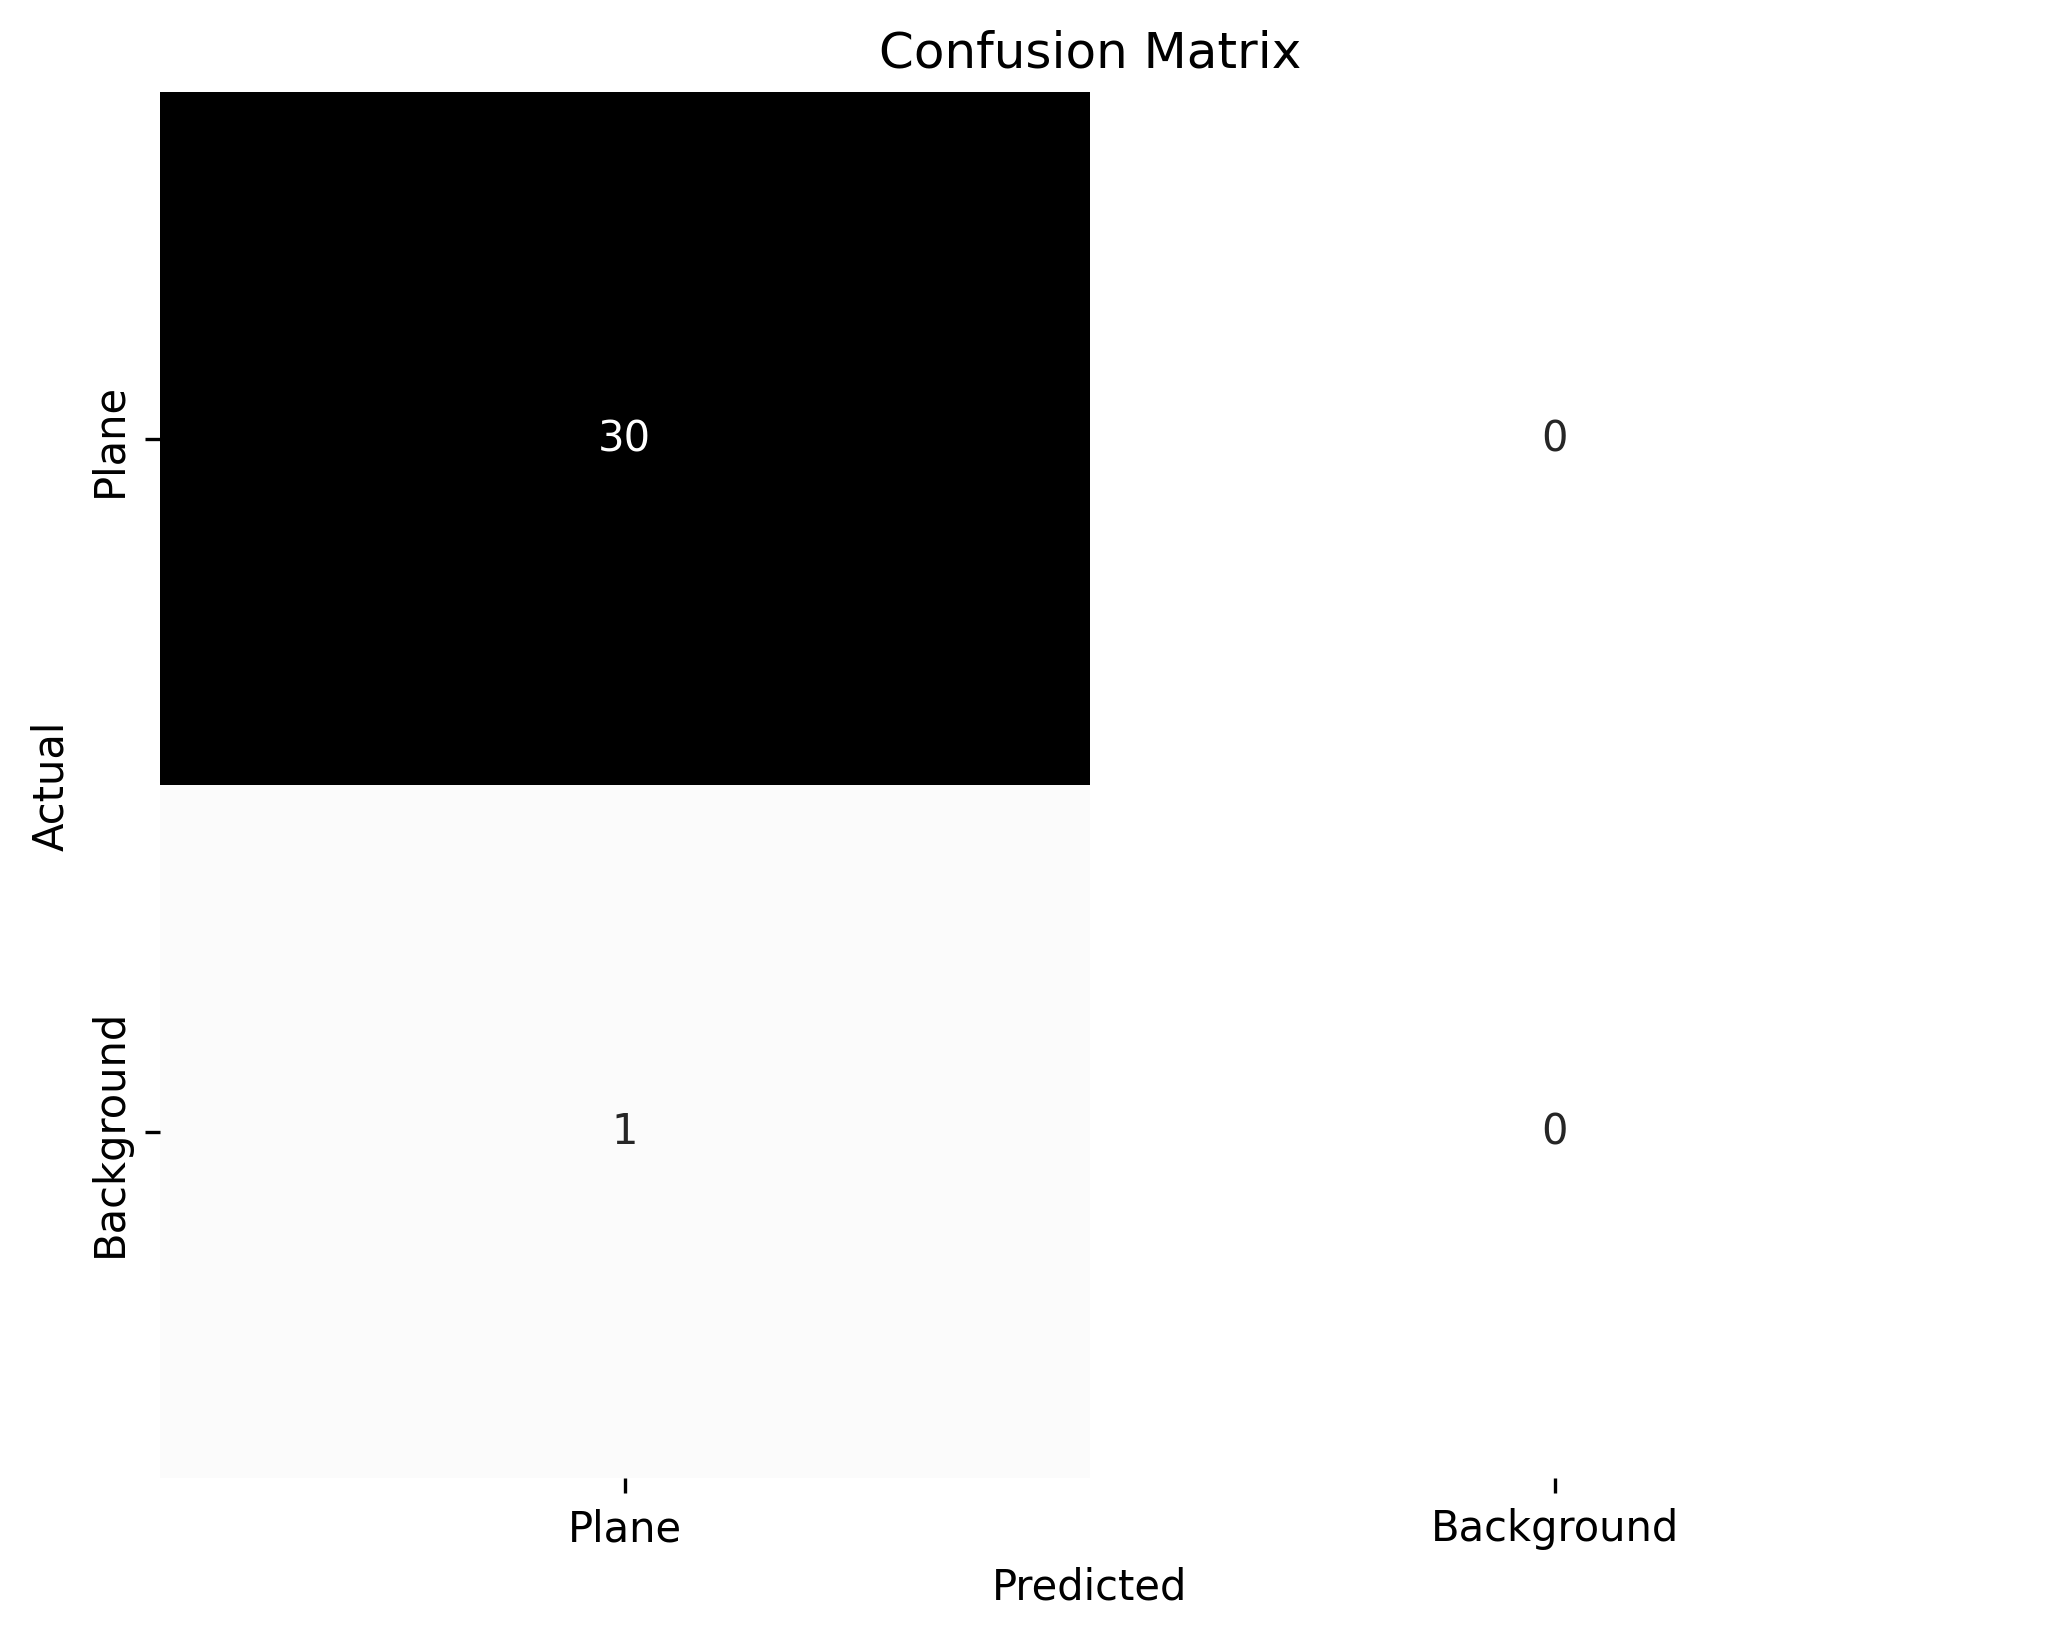

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9677


### **1.8. Validate Model 8 - Level 2**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_2.yaml', imgsz=1280, name="val_level_2_1280")

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level2/val/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.22s/it]


                   all          4         31      0.998          1      0.995      0.768
Speed: 1.0ms preprocess, 251.7ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val_level_2_1280


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9950 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.9950 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.7683 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9983 - Mean Precision of all classes.
metrics.box.mr: 1.0000 - Mean Recall of all classes.
metrics.box.p: 0.9983 - Precision for each class.
metrics.box.r: 1.0000 - Recall for each class.
metrics.box.f1: 0.9991 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9983 - Percentage of correct positive predictions.
Recall: 1.0000 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9950 - Mean Average Precision at 50% IOU.
mAP50-95: 0.7683 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9991 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

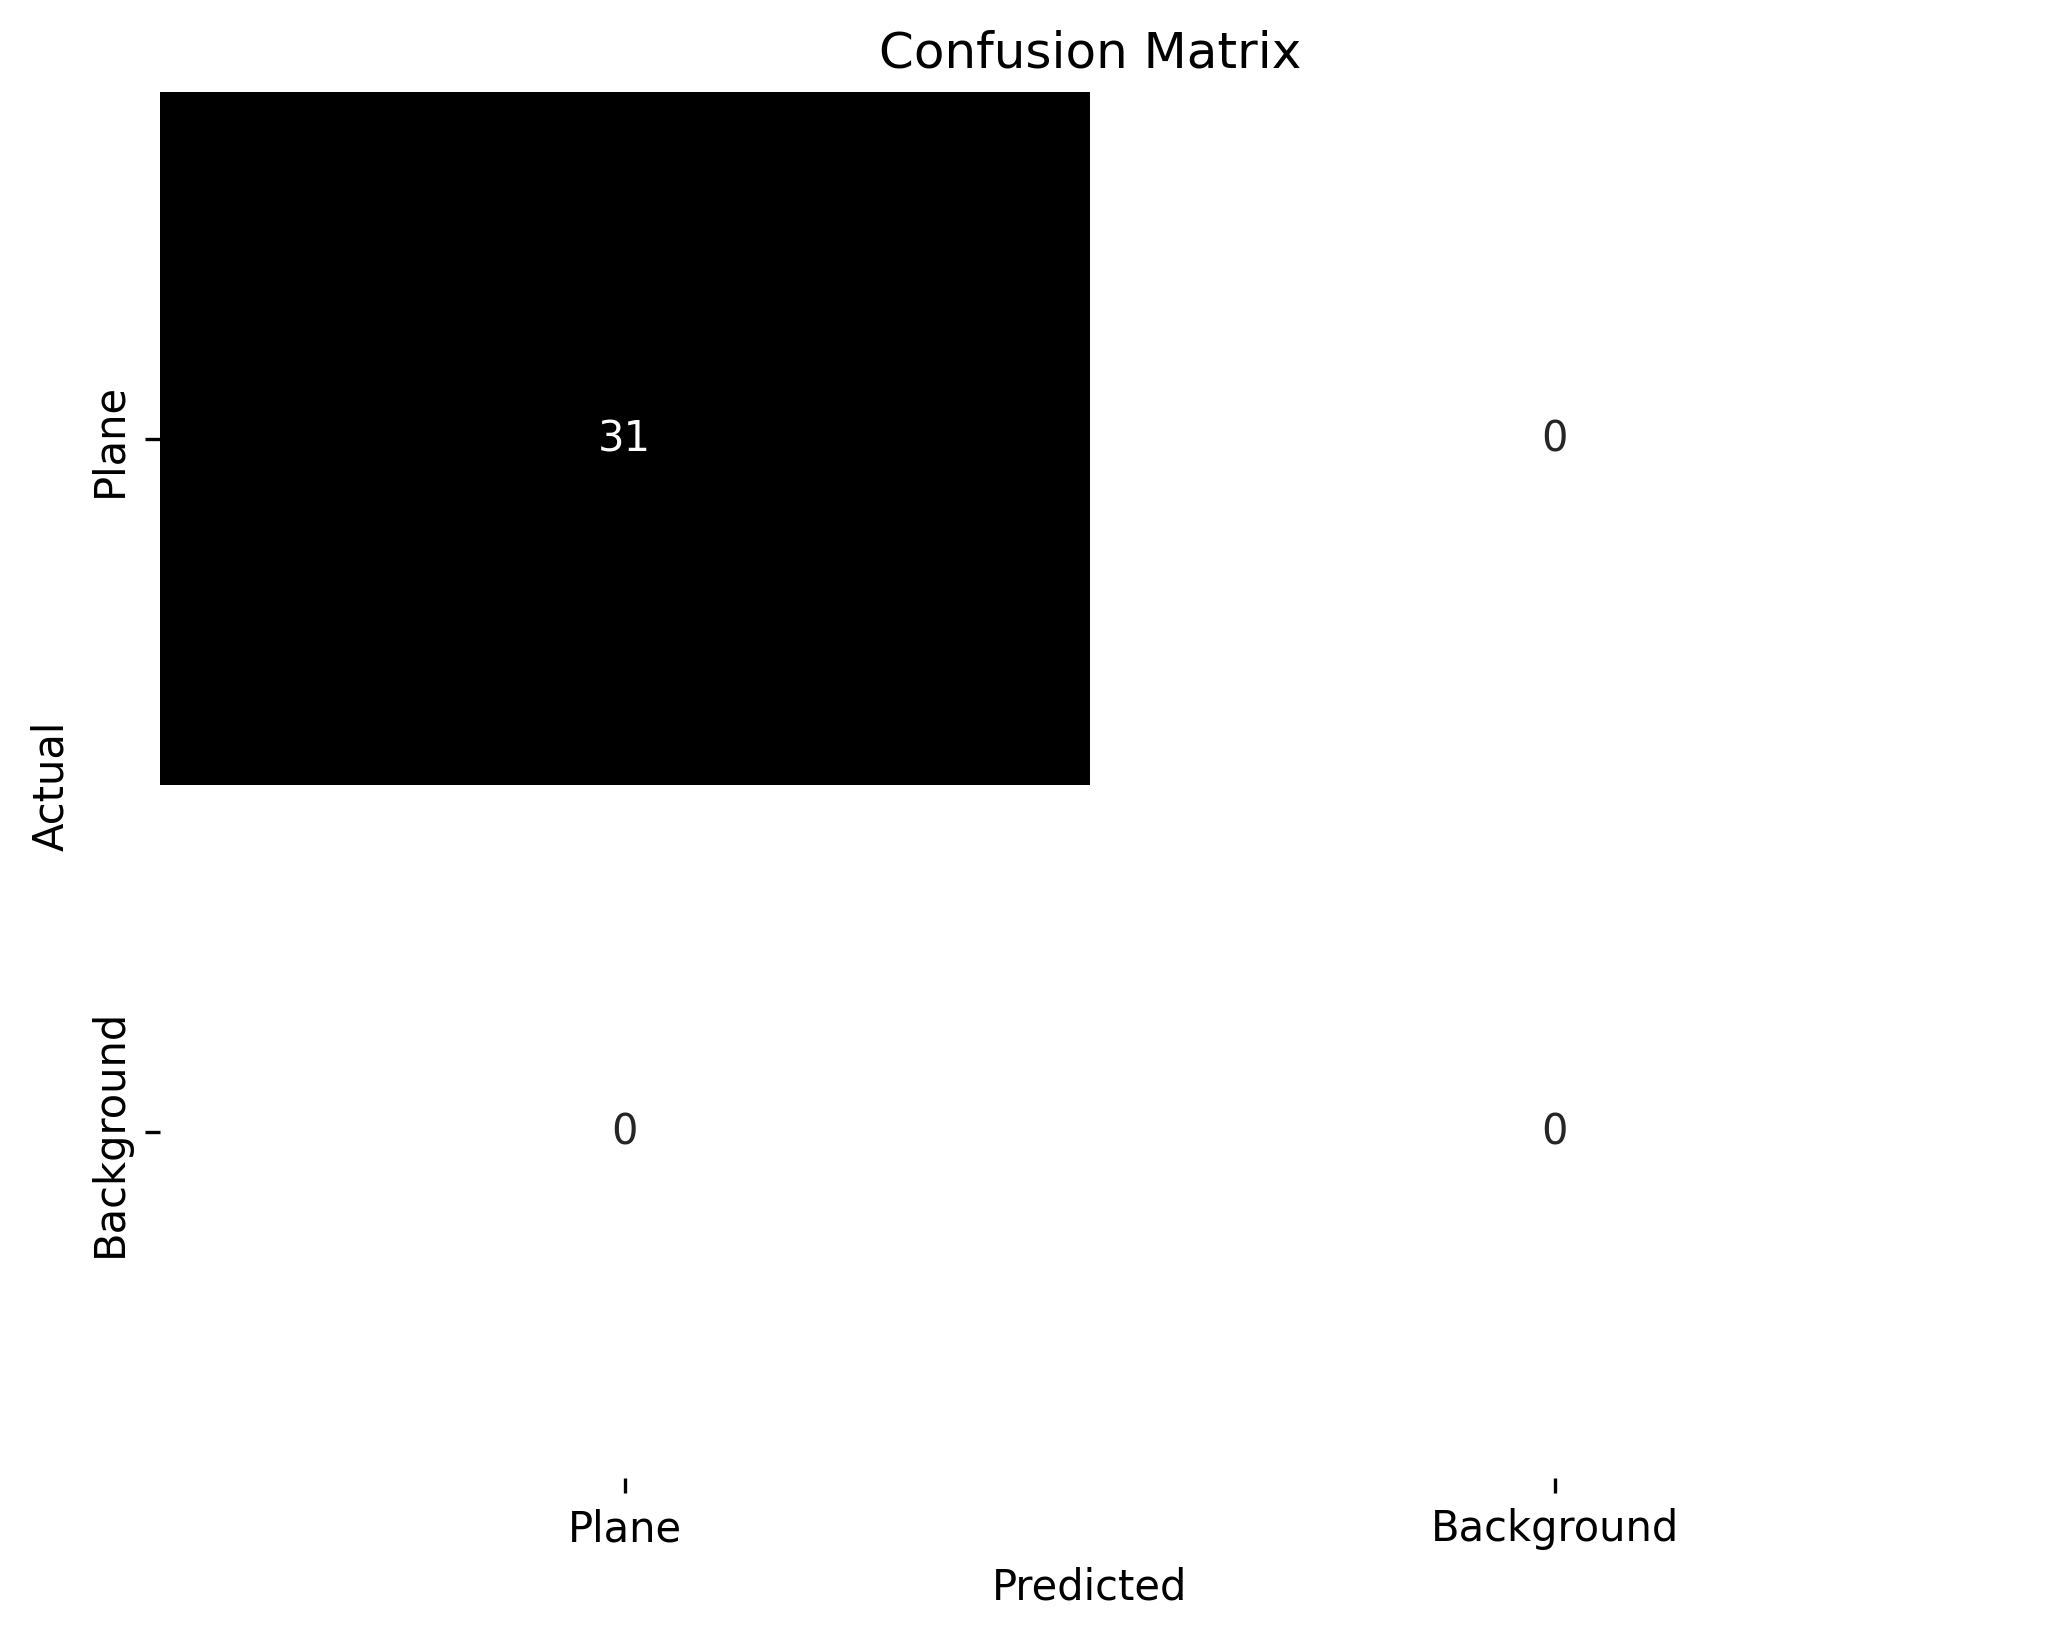

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 1.0


### **1.9. Validate Model 9 - Level 3**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test_3.yaml', imgsz=1280, name="val_level_3_1280")

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Level3/val/labels.cache... 12 images, 4 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:20<00:00, 20.67s/it]


                   all         16         31      0.967      0.933       0.94      0.692
Speed: 0.8ms preprocess, 203.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val_level_3_1280


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9399 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.8978 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.6923 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9666 - Mean Precision of all classes.
metrics.box.mr: 0.9334 - Mean Recall of all classes.
metrics.box.p: 0.9666 - Precision for each class.
metrics.box.r: 0.9334 - Recall for each class.
metrics.box.f1: 0.9497 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9666 - Percentage of correct positive predictions.
Recall: 0.9334 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9399 - Mean Average Precision at 50% IOU.
mAP50-95: 0.6923 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9497 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

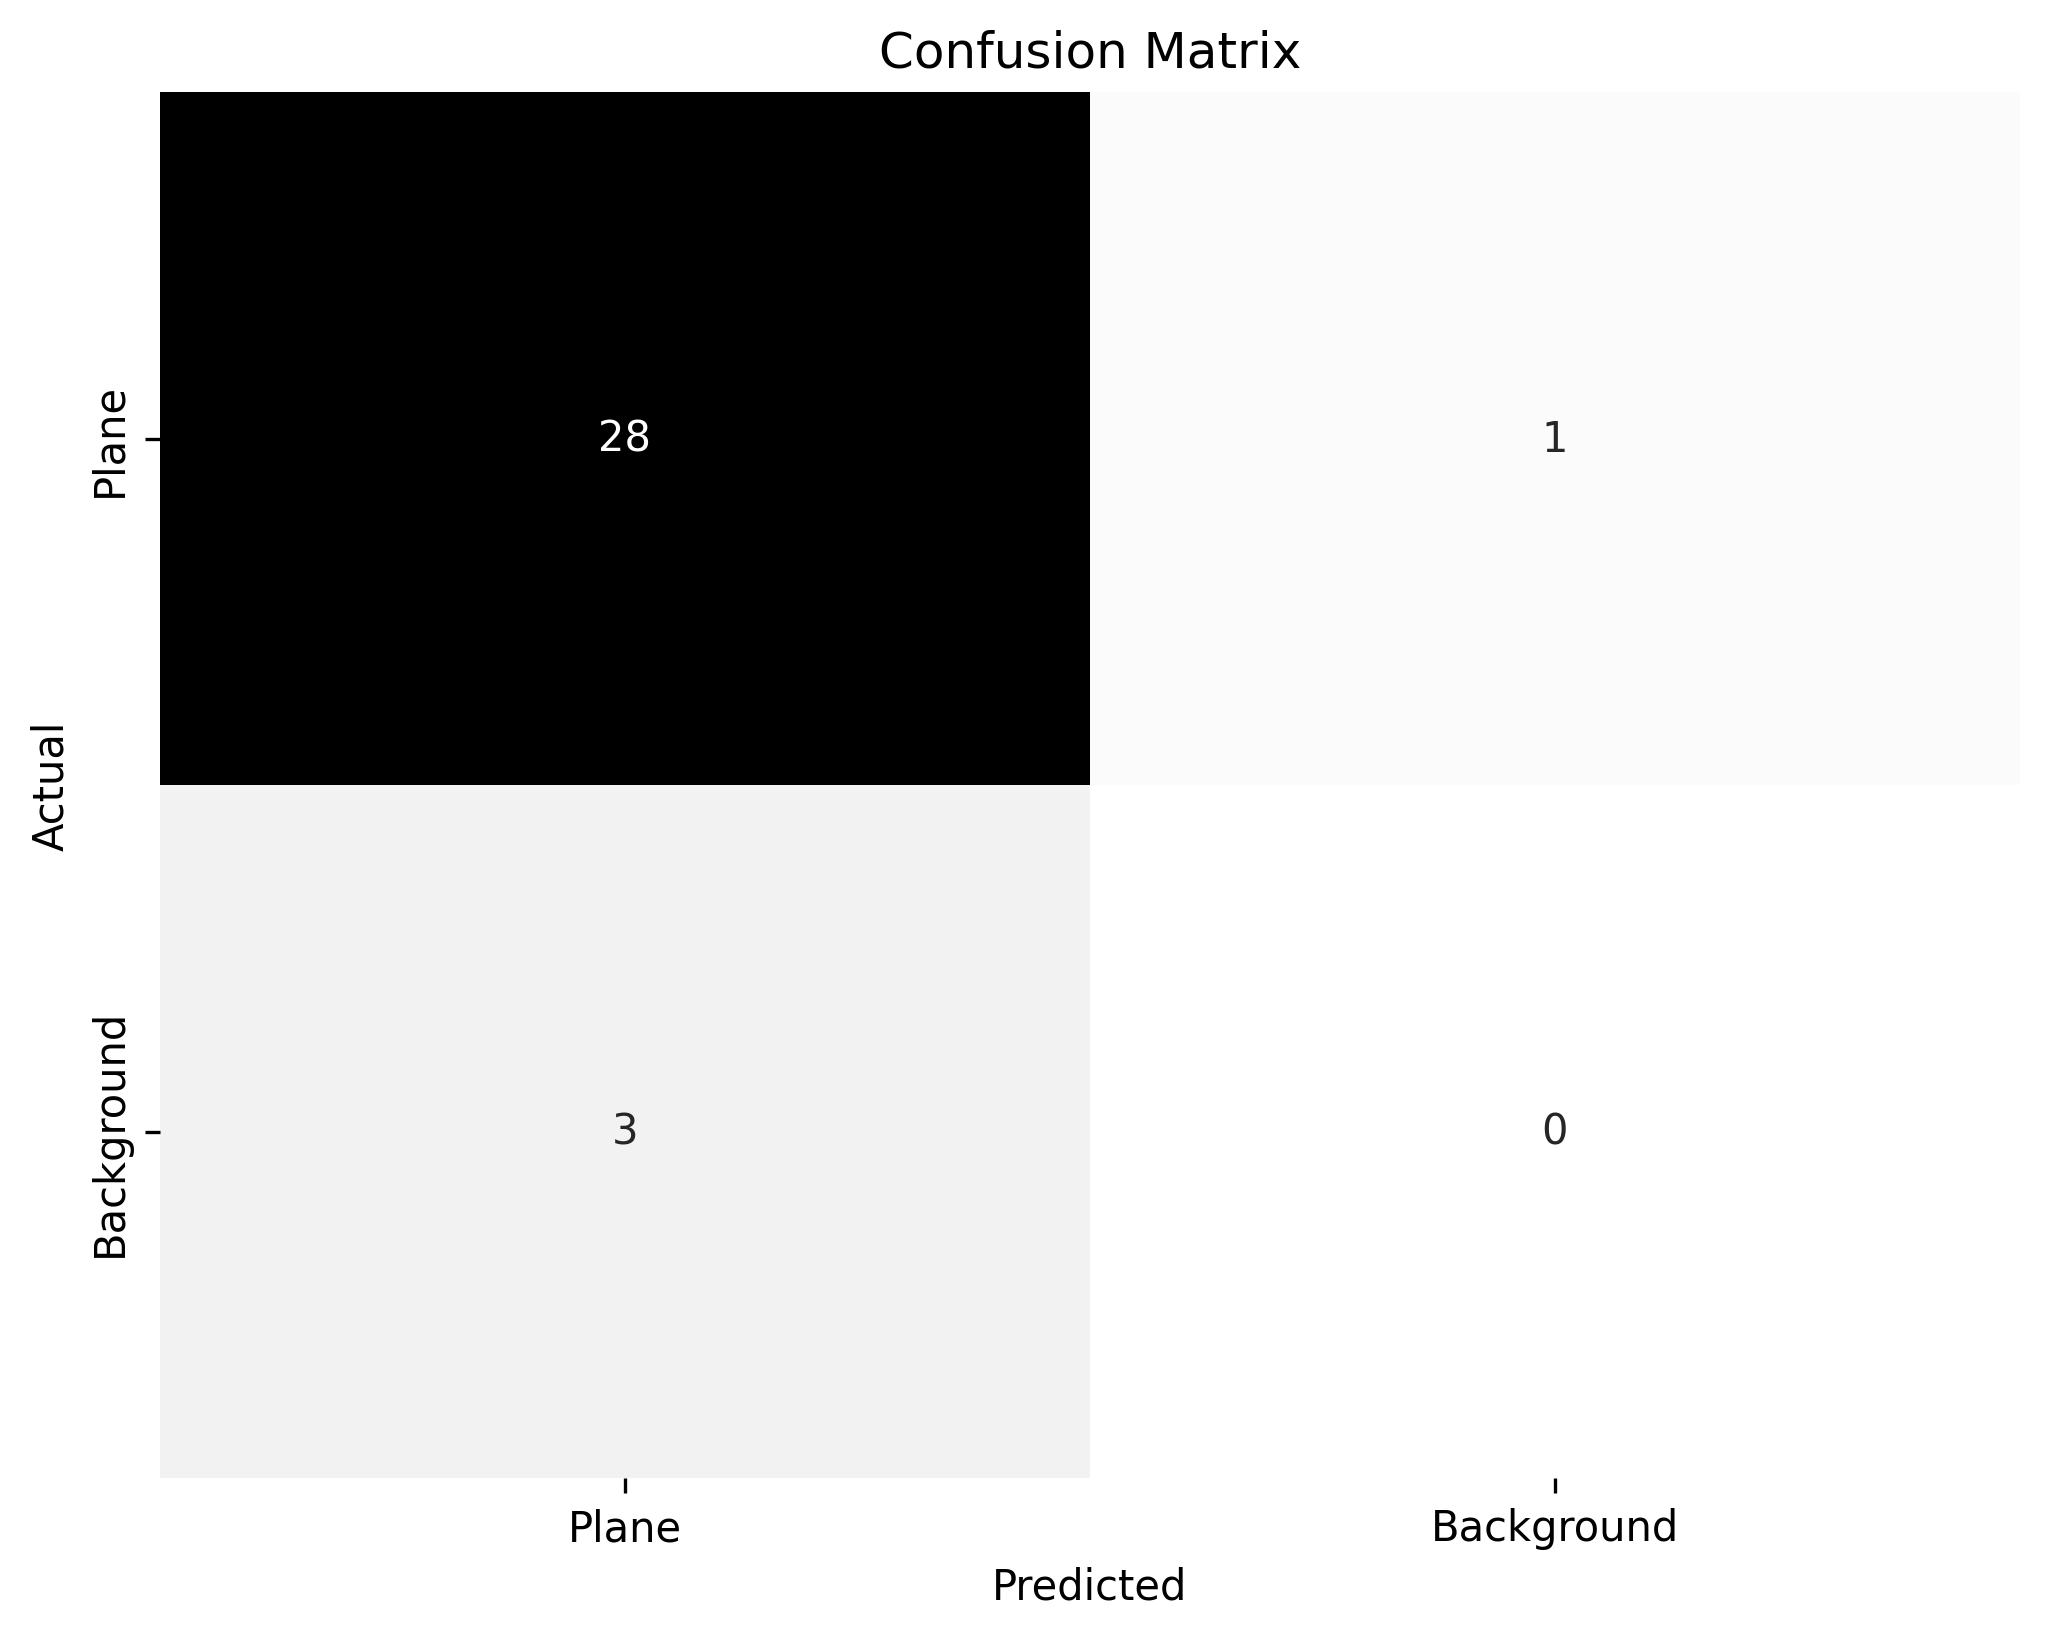

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.875


## **3. Move Model Items into Google Drive**

Instead of uploading and downloading files, we can directly move them to the desired path.

In [ ]:
shutil.move("/content/runs/detect/", "/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Validation/")

'/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/6-Comprehensive Inference/3-Beijing/Validation/detect'

In [ ]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2024-10-14 14:16:39
